In [1]:
import pandas as pd

train_dta = pd.read_csv("training_data.txt", delimiter=' ', header=None)
test_dta = pd.read_csv("testing_data.txt", delimiter=' ', header=None)

In [2]:
X_train_dta = train_dta.iloc[:,:-1].values
y_train_dta = train_dta.iloc[:,-1]
X_test_dta = test_dta.iloc[:, :-1].values
y_test_dta = test_dta.iloc[:,-1]

In [3]:
print("X_train shape: ", X_train_dta.shape)
print("X_test shape: ", X_test_dta.shape)

X_train shape:  (80, 2)
X_test shape:  (20, 2)


# Part 1

In [4]:
import numpy as np

class Perceptron:
    def __init__(self, LR=0.1):
        self.LR = LR
        self.bias = 0.0
        self.weight = None
        self.misclassified_samples = []

    def fit(self, x, y, No_Iterations=10):
        self.bias = 0.0
        self.weight = np.zeros(x.shape[1])
        self.misclassified_samples = []

        for _ in range(No_Iterations):
            errors_values = 0
            for xi, yi in zip(x, y):
                update = self.LR * (yi - self.predict(xi))

                self.bias += update
                self.weight += update * xi
                errors_values += int(update != 0.0)

            self.misclassified_samples.append(errors_values)

    def f(self, x):
        return np.dot(x, self.weight) + self.bias

    def predict(self, x):
        return np.where(self.f(x) >= 0, 1, -1)

In [5]:
perceptron = Perceptron()
perceptron.fit(X_train_dta, y_train_dta)

In [6]:
matched = 0
for rec, label in zip(X_test_dta, y_test_dta):
    prediction = perceptron.predict(rec)
    print(rec, "Actual label: ", label, "Predicted label: ", prediction)
    
    if label == prediction:
        matched += 1

print("Accuracy rate: ", matched / len(y_test_dta) * 100, "%")

print("Learned weights: ", perceptron.weight)
print("Learned bias: ", perceptron.bias)

[5.32 0.37] Actual label:  1 Predicted label:  1
[-4.06 -6.25] Actual label:  1 Predicted label:  1
[-1.17 -6.83] Actual label:  1 Predicted label:  1
[ 7.6  -4.52] Actual label:  1 Predicted label:  1
[-1.72 -4.08] Actual label:  1 Predicted label:  1
[2.58 1.6 ] Actual label:  1 Predicted label:  1
[ 2.   -4.68] Actual label:  1 Predicted label:  1
[-4.31 -4.93] Actual label:  1 Predicted label:  1
[-3.45 -7.12] Actual label:  1 Predicted label:  1
[ 9.2  -6.23] Actual label:  1 Predicted label:  1
[-5.56  7.41] Actual label:  -1 Predicted label:  -1
[-5.87  8.37] Actual label:  -1 Predicted label:  -1
[-0.23  2.23] Actual label:  -1 Predicted label:  -1
[-8.39  4.77] Actual label:  -1 Predicted label:  -1
[-6.69  9.28] Actual label:  -1 Predicted label:  -1
[-9.51 -5.91] Actual label:  -1 Predicted label:  -1
[4.   5.59] Actual label:  -1 Predicted label:  -1
[-9.54  1.55] Actual label:  -1 Predicted label:  -1
[-9.97  0.31] Actual label:  -1 Predicted label:  -1
[2.8  9.71] Actual 

# Part 2

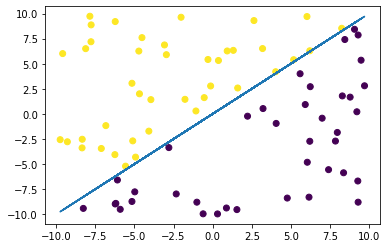

In [7]:
import matplotlib.pyplot as plt

plt.plot(X_train_dta[:,1], X_train_dta[:,1])
plt.scatter(X_train_dta[:,1], X_train_dta[:, 0], c = y_train_dta)

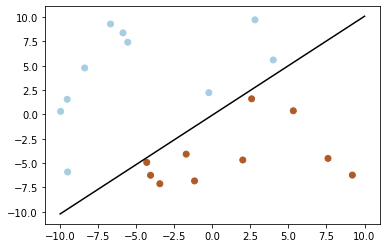

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

clf_sk = Perceptron()
clf_sk.fit(X_train_dta, y_train_dta)

weights= clf_sk.weight
a = -weights[0] / weights[1]
x = np.linspace(-10, 10)
y = a * x - (clf_sk.bias) / weights[1]

plt.plot(x, y, 'k-')
plt.scatter(X_test_dta[:, 0], X_test_dta[:, 1], c=y_test_dta, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()